# Abalone Case Study

In [129]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [130]:
ab=pd.read_csv('abalone.csv')
ab.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


It is a regression model

# EDA

# Univariate Analysis

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


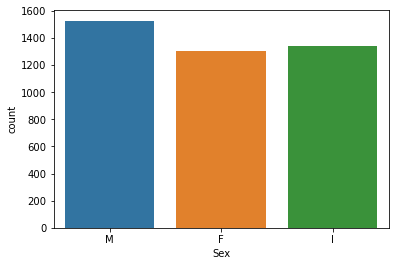

In [131]:
sns.countplot(ab['Sex'])
print(ab['Sex'].value_counts())
plt.show()

we can observe that total nmber of male is 1528, Female 1307 and Infants 1342

In [132]:
ab.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have one categorical variable and one integer type and rest is float type

In [133]:
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

we can observe no missing value

In [134]:
ab.shape

(4177, 9)

Our dataset have 4177 rows and 9 columns

In [135]:
ab['Age']=ab['Rings']+1.5
ab.drop('Rings',axis=1,inplace=True)

As our problem statement age of the abalone is 1.5 in years is aded to rings.So we drop rings column and age is added.

In [136]:
ab.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

Columns of dataset we can observe column rings removed and instead of rings 'Age' were added

In [137]:
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Statistical Measures of our dataset

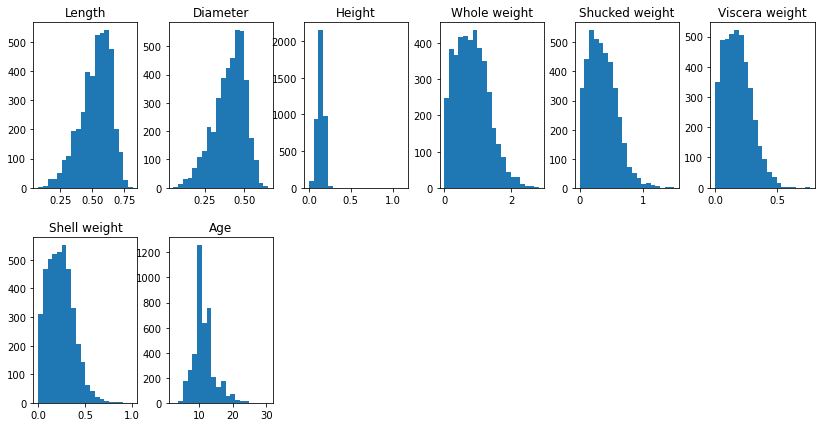

In [138]:
ab.hist(figsize=(14,7),layout=(2,6),bins=20,grid=False)
plt.show()

We can observe the histogram that some columns are right skewed some are left skewed

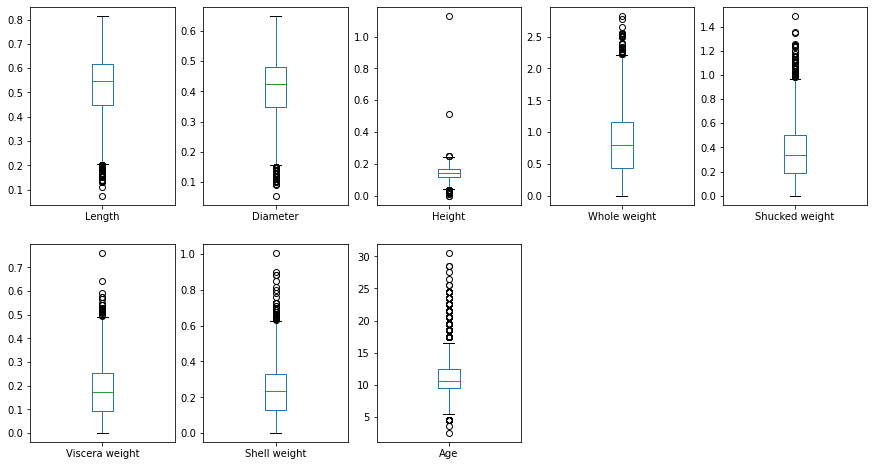

In [139]:
ab.plot(kind='box',layout=(2,5),figsize=(15,8),subplots=True)
plt.show()

We can detect some outliers

In [140]:
ab['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

Ages of abalone

# Bivariate Analysis

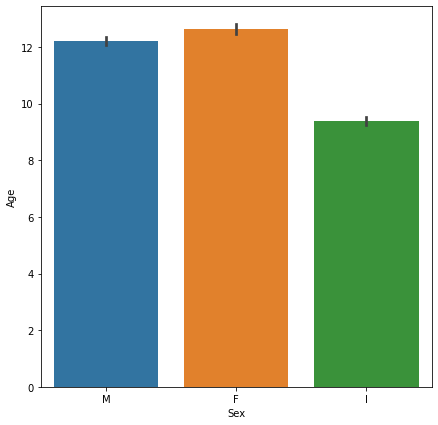

In [141]:
plt.figure(figsize=(7,7))
sns.barplot(x='Sex',y='Age',data=ab)
plt.show()

we can observe that femzle abalones are most aged 

In [142]:
#sns.swarmplot?

In [143]:
#sns.violinplot?

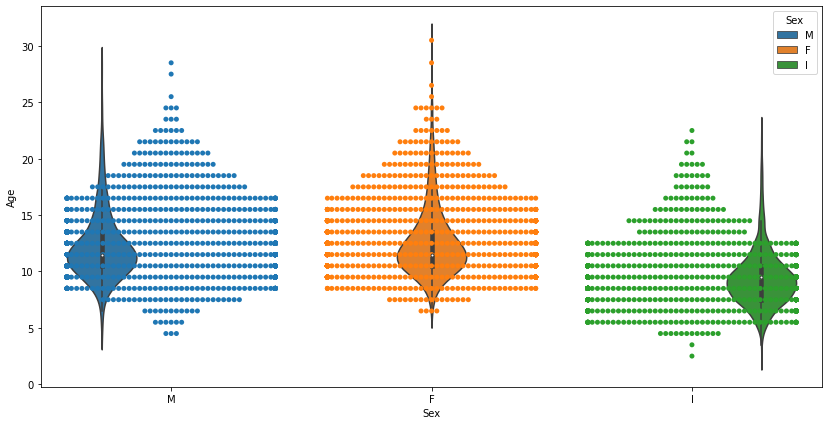

In [144]:
plt.figure(figsize=(14,7))
sns.swarmplot(x='Sex',y='Age',data=ab)
sns.violinplot(x='Sex',y='Age',data=ab,hue='Sex')
plt.show()

We can observe that majority of male rings between 7 to 18(approx). Majority of females from 8 to 19(approx) and Infants from 6 to 12(approx).

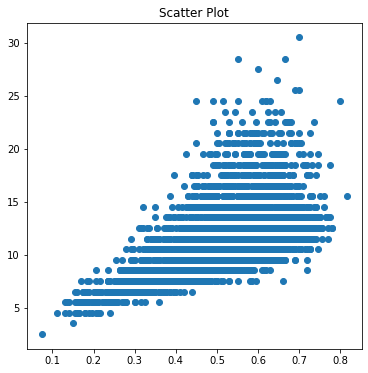

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(x='Length',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

There is some relation between length and ages

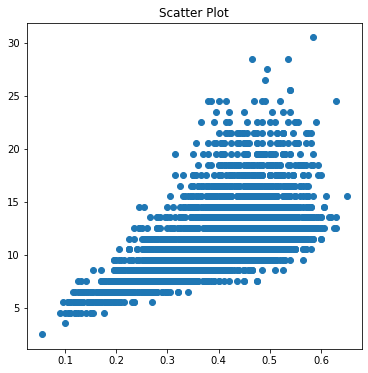

In [146]:
plt.figure(figsize=(6,6))
plt.scatter(x='Diameter',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

Points are scattered randomly

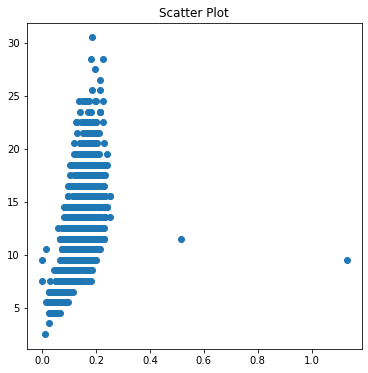

In [147]:
plt.figure(figsize=(6,6))
plt.scatter(x='Height',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

Points scattered randomly and presnce of outliers huge difference

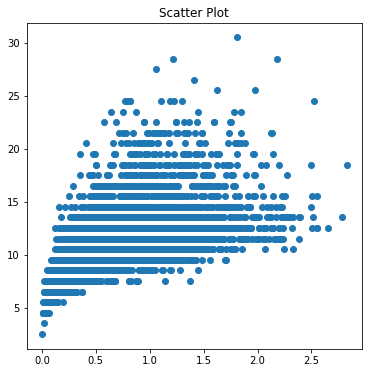

In [148]:
plt.figure(figsize=(6,6))
plt.scatter(x='Whole weight',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

Gives some realtionship between columns

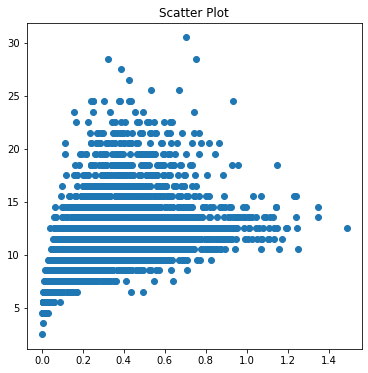

In [149]:
plt.figure(figsize=(6,6))
plt.scatter(x='Shucked weight',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

Some points are scattered randomly 

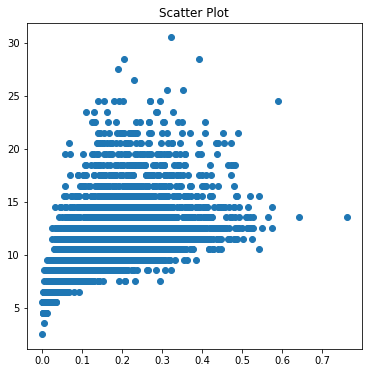

In [150]:
plt.figure(figsize=(6,6))
plt.scatter(x='Viscera weight',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

It gives some relation between two columns

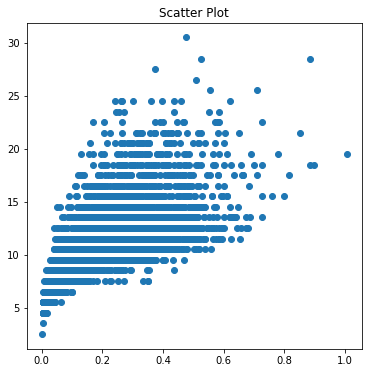

In [151]:
plt.figure(figsize=(6,6))
plt.scatter(x='Shell weight',y='Age',data=ab)
plt.title("Scatter Plot")
plt.show()

It shows that shell weights have some relationship among age

# Multivariate Analysis

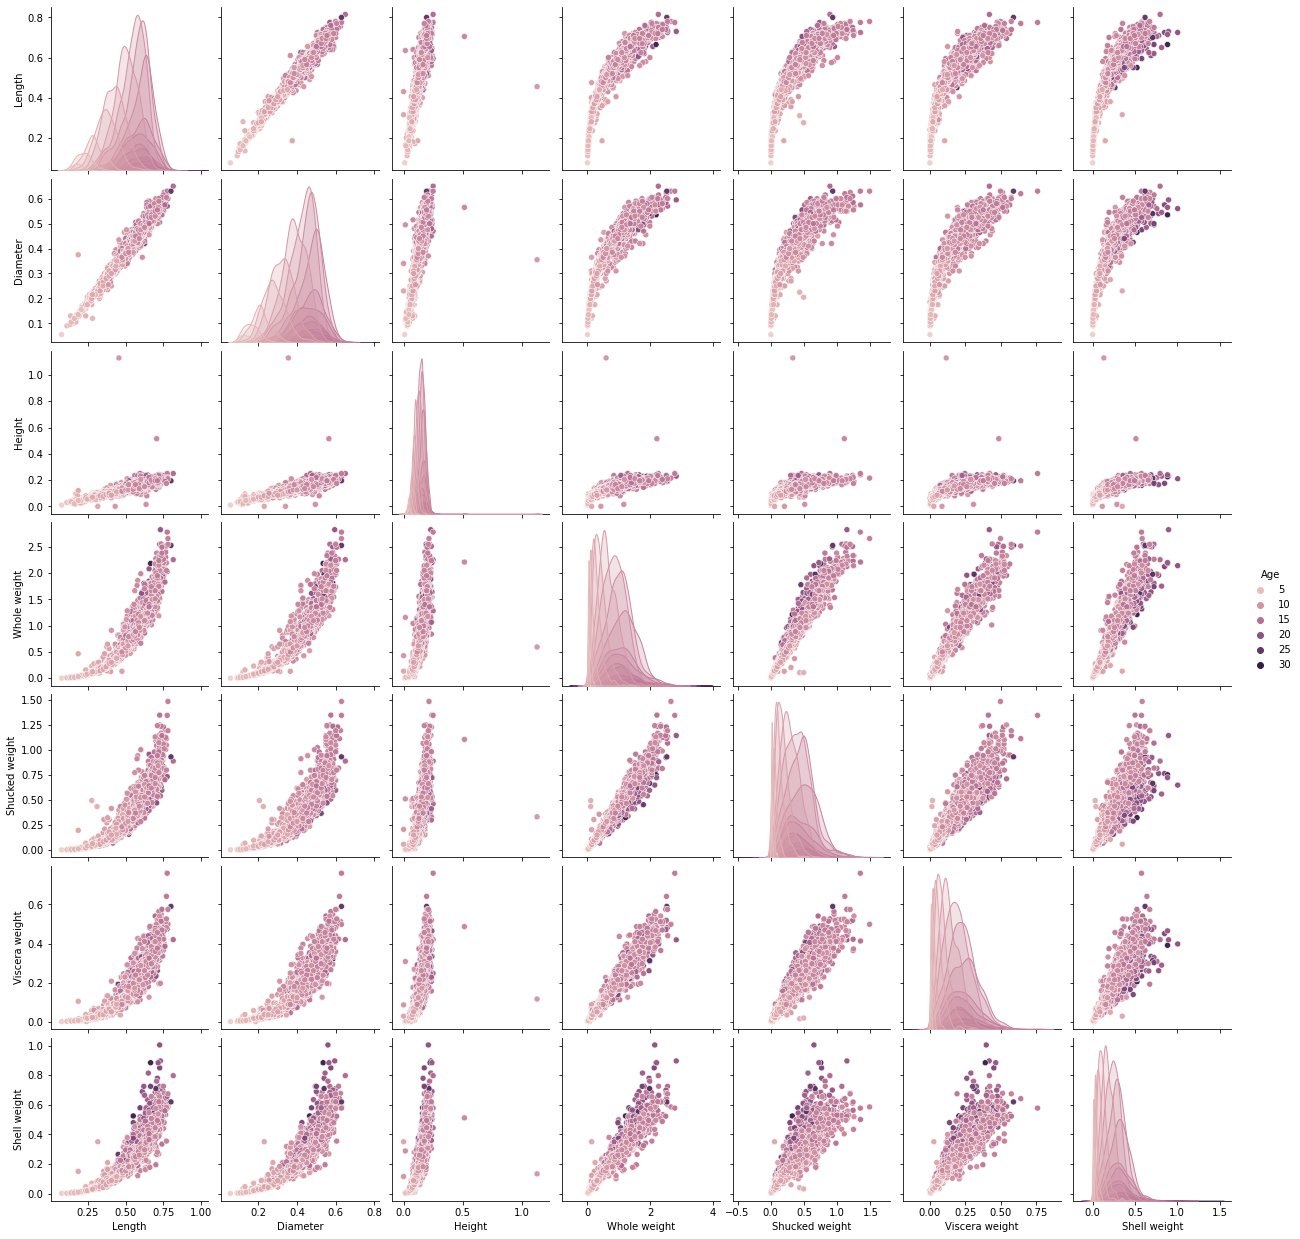

In [152]:
#pairplot
sns.pairplot(ab,hue='Age')
plt.show()

Multiple variable analysis using pairplot

 length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

# Correlation

In [153]:
corr=ab.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Negative and positive correlations are present

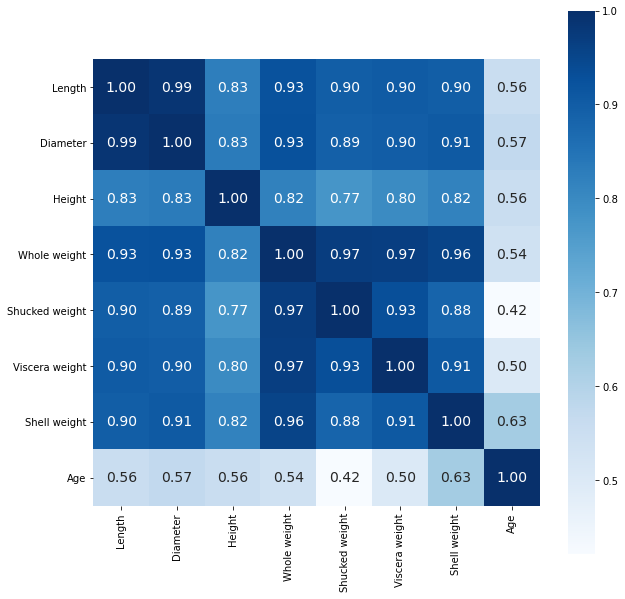

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',cmap='Blues',annot_kws={'size':14})
plt.show()

Visualization correlation using heatmap. we can observe that Age is least correlated with shucked weight

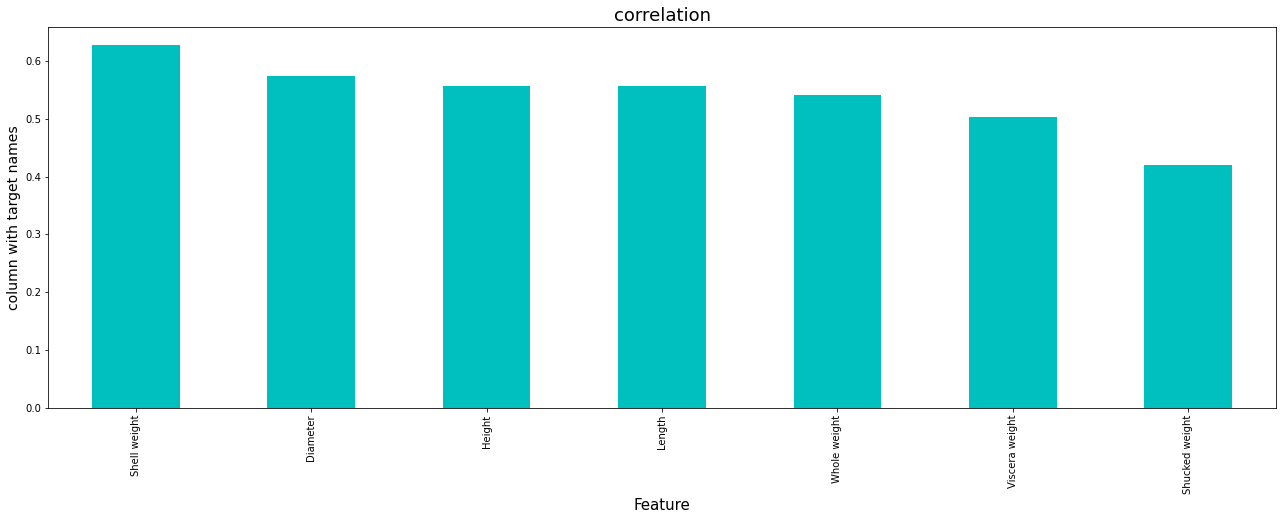

In [155]:
plt.figure(figsize=(22,7))
corr['Age'].sort_values(ascending=False).drop(['Age']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Checking positive and negative correlated columns with target variable

# Encoding

In [156]:
le=LabelEncoder()
ab['Sex']=le.fit_transform(ab['Sex'])

Encoded our column 'Sex'

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


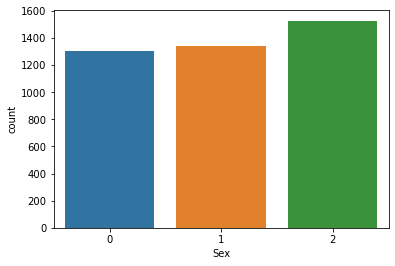

In [157]:
print(ab['Sex'].value_counts())
sns.countplot(ab['Sex'])
plt.show()

We can observe that 'Male' become 2,'Infants' become 1 and "Female" become 0 respectively after encoding

# Outliers Removal

In [158]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ab))
abalone=ab[(z<3).all(axis=1)]

We remove outliers using zscore

In [159]:
ab.shape

(4177, 9)

Shape of dataset before removing outliers

In [160]:
abalone.shape

(4027, 9)

Shape of dataset after removing outliers

In [161]:
print("Percentage of data loss after removing outliers:",(4177-4027)/4177*100)

Percentage of data loss after removing outliers: 3.5910940866650707


We have loss upto 3.50% of data which is not a big loss,so I am proceeding with removing outliers

In [162]:
abalone.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

We can obseve skewness present Height

# Removal of skewness

In [163]:
abalone['Height']=np.sqrt(abalone['Height'])

Removed Skewness using sqrt method

In [164]:
abalone.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.653485
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

After Removing skewness

Seperating Independent dependent variable

In [165]:
x=abalone.drop('Age', axis = 1)
y = abalone['Age']

Independent and dependent vaiable seperated

In [166]:
x.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055


'x' contains features

In [167]:
y.head(10)

0     16.5
1      8.5
2     10.5
3     11.5
4      8.5
5      9.5
7     17.5
8     10.5
9     20.5
10    15.5
Name: Age, dtype: float64

'y' contains target 'Age

# Splitting model into training and testing

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

Splitted into training and testing model

In [169]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3020, 8) (1007, 8) (3020,) (1007,)


Shapes of training and testing model

# Building models

In [170]:
#knearest neighbor
knn=KNeighborsRegressor()

Instance variable

In [171]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f"At random state {i},'Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train,pred_train))}")
    print(f"At random state {i},the root mean squared error of testing data is:- {np.sqrt(mean_squared_error(y_test,pred_test))}")
    print("\n")

At random state 0,'Root Mean Squared Error is: 1.6289800977729583
At random state 0,the root mean squared error of testing data is:- 2.0040574532850917


At random state 1,'Root Mean Squared Error is: 1.656238457413234
At random state 1,the root mean squared error of testing data is:- 1.9805809986853669


At random state 2,'Root Mean Squared Error is: 1.6499809350694679
At random state 2,the root mean squared error of testing data is:- 2.0330438091908825


At random state 3,'Root Mean Squared Error is: 1.6395323190366096
At random state 3,the root mean squared error of testing data is:- 2.0282219332524525


At random state 4,'Root Mean Squared Error is: 1.6968923680096129
At random state 4,the root mean squared error of testing data is:- 1.8860487114089468


At random state 5,'Root Mean Squared Error is: 1.6348035910949525
At random state 5,the root mean squared error of testing data is:- 2.0568870918066735


At random state 6,'Root Mean Squared Error is: 1.6224868493023112
At random s

At random state 53,'Root Mean Squared Error is: 1.6638382180650977
At random state 53,the root mean squared error of testing data is:- 1.9824152462438889


At random state 54,'Root Mean Squared Error is: 1.6262906234904573
At random state 54,the root mean squared error of testing data is:- 2.0912737787948465


At random state 55,'Root Mean Squared Error is: 1.664116813271208
At random state 55,the root mean squared error of testing data is:- 1.9788153096717893


At random state 56,'Root Mean Squared Error is: 1.6438889442195153
At random state 56,the root mean squared error of testing data is:- 2.0342255247638583


At random state 57,'Root Mean Squared Error is: 1.677387593573068
At random state 57,the root mean squared error of testing data is:- 1.9827257977032162


At random state 58,'Root Mean Squared Error is: 1.6403722723982443
At random state 58,the root mean squared error of testing data is:- 2.0180516034238147


At random state 59,'Root Mean Squared Error is: 1.646557717749607


Here I choose random state = 60 because it have least RMSE between testing and training

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)
knn.fit(x_train,y_train)
predknn=rfc.predict(x_test)
r2=r2_score(y_test,predknn)
print(r2)

0.8235852708896684


choose perfect random state and fit the data and predict the data and find r2 score of the model

In [173]:
#random forest regerssor
rfr=RandomForestRegressor()

Storing into instance variable

In [174]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print(f"At random state {i},'Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train,pred_train))}")
    print(f"At random state {i},the RMSE of testing data is:- {np.sqrt(mean_squared_error(y_test,pred_test))}")
    print("\n")

At random state 0,'Root Mean Squared Error is: 0.7268818463430259
At random state 0,the RMSE of testing data is:- 1.9888312527054264


At random state 1,'Root Mean Squared Error is: 0.7464054035777516
At random state 1,the RMSE of testing data is:- 1.9106314953498595


At random state 2,'Root Mean Squared Error is: 0.7218193991803715
At random state 2,the RMSE of testing data is:- 1.9860048072297365


At random state 3,'Root Mean Squared Error is: 0.7322857257286669
At random state 3,the RMSE of testing data is:- 1.9636082598656261


At random state 4,'Root Mean Squared Error is: 0.749558346782816
At random state 4,the RMSE of testing data is:- 1.8571101189864074


At random state 5,'Root Mean Squared Error is: 0.724938590685377
At random state 5,the RMSE of testing data is:- 1.9982156886660116


At random state 6,'Root Mean Squared Error is: 0.7223407728025466
At random state 6,the RMSE of testing data is:- 1.9804119720268731


At random state 7,'Root Mean Squared Error is: 0.71376417

At random state 61,'Root Mean Squared Error is: 0.7270089316885776
At random state 61,the RMSE of testing data is:- 2.0147869453009943


At random state 62,'Root Mean Squared Error is: 0.7389442083448232
At random state 62,the RMSE of testing data is:- 1.8844026603398567


At random state 63,'Root Mean Squared Error is: 0.7440275666045915
At random state 63,the RMSE of testing data is:- 1.9213860180576128


At random state 64,'Root Mean Squared Error is: 0.7217692573995877
At random state 64,the RMSE of testing data is:- 2.0201746362808572


At random state 65,'Root Mean Squared Error is: 0.7280245656651433
At random state 65,the RMSE of testing data is:- 1.9848392859530373


At random state 66,'Root Mean Squared Error is: 0.7284896150291355
At random state 66,the RMSE of testing data is:- 1.9445275999305738


At random state 67,'Root Mean Squared Error is: 0.7356184945584388
At random state 67,the RMSE of testing data is:- 1.950995926256667


At random state 68,'Root Mean Squared Erro

At random state 121,'Root Mean Squared Error is: 0.7339466254480789
At random state 121,the RMSE of testing data is:- 1.937040530777525


At random state 122,'Root Mean Squared Error is: 0.7309510497195367
At random state 122,the RMSE of testing data is:- 1.915794177018791


At random state 123,'Root Mean Squared Error is: 0.7265978737917388
At random state 123,the RMSE of testing data is:- 1.9552880708275586


At random state 124,'Root Mean Squared Error is: 0.725069167744185
At random state 124,the RMSE of testing data is:- 2.044251780628254


At random state 125,'Root Mean Squared Error is: 0.7227044727735448
At random state 125,the RMSE of testing data is:- 1.9634140007223064


At random state 126,'Root Mean Squared Error is: 0.7334303869150304
At random state 126,the RMSE of testing data is:- 1.9526315856390708


At random state 127,'Root Mean Squared Error is: 0.713831908349216
At random state 127,the RMSE of testing data is:- 2.0242410766617907


At random state 128,'Root Mean S

Here I choose random state 78 among others it shows least difference

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=78)
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
r2_rf=r2_score(y_test,predrfr)
print(r2_rf)

0.5548717218618873


choose perfect random state and fit the data and predict the data and find r2 score of the model

In [176]:
#support vector regressor
svr=SVR()

Storing into instance variable

In [177]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print(f"At random state {i},RMSE of training data is: {np.sqrt(mean_squared_error(y_train,pred_train))}")
    print(f"At random state {i},RMSE of testing data is:- {np.sqrt(mean_squared_error(y_test,pred_test))}")
    print("\n")

At random state 0,RMSE of training data is: 2.0459765529675304
At random state 0,RMSE of testing data is:- 2.0313242429316585


At random state 1,RMSE of training data is: 2.040471715607971
At random state 1,RMSE of testing data is:- 1.985612753007472


At random state 2,RMSE of training data is: 2.0143136479021204
At random state 2,RMSE of testing data is:- 2.0953902005082674


At random state 3,RMSE of training data is: 2.0431691825190055
At random state 3,RMSE of testing data is:- 2.0052690430856037


At random state 4,RMSE of training data is: 2.0797722710800874
At random state 4,RMSE of testing data is:- 1.9058108821281228


At random state 5,RMSE of training data is: 2.013197560839924
At random state 5,RMSE of testing data is:- 2.1099632165940645


At random state 6,RMSE of training data is: 2.027063698358065
At random state 6,RMSE of testing data is:- 2.1145583235865613


At random state 7,RMSE of training data is: 2.0037736421921997
At random state 7,RMSE of testing data is:- 2

At random state 64,RMSE of training data is: 2.024831020467334
At random state 64,RMSE of testing data is:- 2.0641036793114216


At random state 65,RMSE of training data is: 2.030041123076778
At random state 65,RMSE of testing data is:- 2.0862787065049404


At random state 66,RMSE of training data is: 2.037727520893628
At random state 66,RMSE of testing data is:- 2.021732366987797


At random state 67,RMSE of training data is: 2.0398689124313254
At random state 67,RMSE of testing data is:- 2.013662805371233


At random state 68,RMSE of training data is: 2.053678356960615
At random state 68,RMSE of testing data is:- 1.9773006145571945


At random state 69,RMSE of training data is: 2.0317482913695772
At random state 69,RMSE of testing data is:- 2.1093730268248008


At random state 70,RMSE of training data is: 2.0154737090401844
At random state 70,RMSE of testing data is:- 2.1003353323839926


At random state 71,RMSE of training data is: 2.05379578987273
At random state 71,RMSE of testing

At random state 128,RMSE of training data is: 2.044353106780103
At random state 128,RMSE of testing data is:- 2.022578406761689


At random state 129,RMSE of training data is: 2.0277737494271655
At random state 129,RMSE of testing data is:- 2.0947036891328503


At random state 130,RMSE of training data is: 2.0354996344040153
At random state 130,RMSE of testing data is:- 2.1172775112637554


At random state 131,RMSE of training data is: 2.0157472406404726
At random state 131,RMSE of testing data is:- 2.1368226387927947


At random state 132,RMSE of training data is: 2.0424118741463477
At random state 132,RMSE of testing data is:- 1.9886003716480913


At random state 133,RMSE of training data is: 2.043567285122498
At random state 133,RMSE of testing data is:- 2.0079879317141356


At random state 134,RMSE of training data is: 2.021777372304296
At random state 134,RMSE of testing data is:- 2.0705535525319934


At random state 135,RMSE of training data is: 2.0297970184822196
At random state

Here I choose random state 146 

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=146)
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
r2_sv=r2_score(y_test,predsvr)
print(r2_sv)

0.5081759690989044


Fit the model predict the testing data and find r2 score

In [179]:
#Linear regression
lr=LinearRegression()

In [180]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},'Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train,pred_train))}")
    print(f"At random state {i},the RMSE of testing data is:- {np.sqrt(mean_squared_error(y_test,pred_test))}")
    print("\n")

At random state 0,'Root Mean Squared Error is: 1.9871264877804882
At random state 0,the RMSE of testing data is:- 1.9998285106062477


At random state 1,'Root Mean Squared Error is: 1.9930443002112475
At random state 1,the RMSE of testing data is:- 1.985885053082635


At random state 2,'Root Mean Squared Error is: 1.974738418567687
At random state 2,the RMSE of testing data is:- 2.037451655737227


At random state 3,'Root Mean Squared Error is: 1.9962734602161867
At random state 3,the RMSE of testing data is:- 1.9753770722290052


At random state 4,'Root Mean Squared Error is: 2.0154849556364245
At random state 4,the RMSE of testing data is:- 1.9161524972363626


At random state 5,'Root Mean Squared Error is: 1.9719306985689558
At random state 5,the RMSE of testing data is:- 2.0449208959048044


At random state 6,'Root Mean Squared Error is: 1.9796251213341163
At random state 6,the RMSE of testing data is:- 2.0248758009879806


At random state 7,'Root Mean Squared Error is: 1.958043023

At random state 67,'Root Mean Squared Error is: 1.9898568180789031
At random state 67,the RMSE of testing data is:- 1.991621968571959


At random state 68,'Root Mean Squared Error is: 2.0060057100501627
At random state 68,the RMSE of testing data is:- 1.948860896124712


At random state 69,'Root Mean Squared Error is: 1.9840956893259323
At random state 69,the RMSE of testing data is:- 2.0115984435981225


At random state 70,'Root Mean Squared Error is: 1.9754264156563692
At random state 70,the RMSE of testing data is:- 2.034336604136637


At random state 71,'Root Mean Squared Error is: 2.0116155995804164
At random state 71,the RMSE of testing data is:- 1.924713433093088


At random state 72,'Root Mean Squared Error is: 1.988590050603793
At random state 72,the RMSE of testing data is:- 1.9973161870442564


At random state 73,'Root Mean Squared Error is: 1.9883408881613711
At random state 73,the RMSE of testing data is:- 1.9993528592435883


At random state 74,'Root Mean Squared Error is

At random state 132,'Root Mean Squared Error is: 1.9890599101640853
At random state 132,the RMSE of testing data is:- 1.9973198726229433


At random state 133,'Root Mean Squared Error is: 1.9895954123663944
At random state 133,the RMSE of testing data is:- 1.9969153871103684


At random state 134,'Root Mean Squared Error is: 1.976834318841247
At random state 134,the RMSE of testing data is:- 2.033019231804471


At random state 135,'Root Mean Squared Error is: 1.9659934081981685
At random state 135,the RMSE of testing data is:- 2.0624773797078038


At random state 136,'Root Mean Squared Error is: 2.0051760035819495
At random state 136,the RMSE of testing data is:- 1.9467204846639714


At random state 137,'Root Mean Squared Error is: 1.988453359734648
At random state 137,the RMSE of testing data is:- 2.0004217498403847


At random state 138,'Root Mean Squared Error is: 1.9586877720181592
At random state 138,the RMSE of testing data is:- 2.0840684774685245


At random state 139,'Root Mean

Here we choose random state 63 RMSE of testing and training data are approaximately equal

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=63)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2_lr=r2_score(y_test,predlr)
print(r2_lr)

0.5032512183556083


We fitted our training data and predict testing data and find r2 score

# Cross Validation Score

In [182]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(knn,x,y,cv=6).mean(),"r2 score:",r2)
print("CV score and it's mean of Random Forest Regressor:",cross_val_score(rfr,x,y,cv=6).mean(),"r2 score:",r2_rf)
print("CV score and it's mean of Support Vector Regressor:",cross_val_score(svr,x,y,cv=6).mean(),"r2 score:",r2_sv)
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=6).mean(),"r2 score:",r2_lr)

CV score and it's mean of KNearest Neighbors: 0.44396684951360355 r2 score: 0.8235852708896684
CV score and it's mean of Random Forest Regressor: 0.4590489958486563 r2 score: 0.5548717218618873
CV score and it's mean of Support Vector Regressor: 0.4625987322930624 r2 score: 0.5081759690989044
CV score and it's mean of Linear Regression: 0.43062199746512725 r2 score: 0.5032512183556083


The models not showing better r2 score but knn shows better r2 csore

# Hyperparameter Tuning

In [211]:
parameter={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
           'p':np.arange(1,5)}

Calling parametrs into variable

In [212]:
GV=GridSearchCV(knn,parameter,cv=6)

Gridsearchcv variable

In [213]:
GV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']})

Fitting training and testing data

In [214]:
GV.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

Best parameters

In [217]:
compilation=KNeighborsRegressor(algorithm='auto',n_neighbors=9,p=2,weights='distance')
compilation.fit(x_train,y_train)
predcomp=compilation.predict(x_test)
r2_comp=r2_score(y_test,predcomp)
print(r2_comp)

0.5328620770199464


Performing with best parameters

# Saving the model

In [220]:
import pickle
filename = 'abalone.pkl'
pickle.dump(knn, open(filename, 'wb'))

save the model into .pkl file

# Conclusion

In [221]:
a=np.array(y_test)
predicted=np.array(svr.predict(x_test))
ab_con=pd.DataFrame({"Original:":a,"predicted":predicted},index=range(len(a)))
ab_con

,Original:,predicted
0,10.5,10.642096
1,11.5,12.066273
2,13.5,12.858484
3,11.5,12.656225
4,10.5,10.898077
...,...,...
1002,14.5,13.002680
1003,13.5,12.402776
1004,12.5,12.579870
1005,9.5,12.227885


Predicted and actual data